# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("../Pymaceuticals/data/Mouse_metadata.csv")
study_results_path = ("../Pymaceuticals/data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame merging DataFrames by  'Mouse ID':
df_merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
df_merged_data

# Display the data table for preview
df_merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the data table for preview
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
print(study_results.shape)
study_results.info()

(1893, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
print(df_merged_data.shape)
df_merged_data.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [7]:
# Checking the number of mice.
unique_mice_ids = df_merged_data["Mouse ID"].nunique()
print(f"Number of unique mice ids: {unique_mice_ids}")

Number of unique mice ids: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_merged_data[df_merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Check for duplicate time points
duplicate_timepoints = df_merged_data[df_merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

if not duplicate_timepoints.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicate_timepoints)


Mouse IDs with duplicate time points:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female  

In [9]:
# Remove duplicate data
cleaned_data = df_merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the updated number of unique mice IDs
updated_unique_mice_count = cleaned_data['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice_count}")

Updated number of unique mice IDs: 249


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
df_merged_data.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [11]:
#Other Optional: Get all the data for the duplicate mouse ID. 
mask = df_merged_data["Mouse ID"] == "g989"
df_merged_data.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df_merged_data["Mouse ID"] != "g989"
df_clean_data = df_merged_data.loc[mask].reset_index(drop=True)
df_clean_data.shape

(1880, 8)

In [13]:
# Checking the number of mice in the clean DataFrame.
df_clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = df_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = df_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = df_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = df_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = df_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

stats_summary = {
    "Tumor Average": mean_tumor,
    "Tumor Median": median_tumor,
    "Tumor Variation ": var_tumor,
    "Tumor Standard Dev": std_tumor,
     "Tumor SEM": sem_tumor
}

leaderboard = pd.DataFrame(stats_summary).reset_index()
leaderboard


,Drug Regimen,Tumor Average,Tumor Median,Tumor Variation,Tumor Standard Dev,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary = df_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
stats_summary.columns = ['Tumor Vol Mean', 'Tumor Vol Median', 'Tumor Vol Variance', 'Tumor Vol Standard Dev.', 'Tumor Vol SEM']

# Display the summary statistics DataFrame
stats_summary.reset_index()

,Drug Regimen,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Dev.,Tumor Vol SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

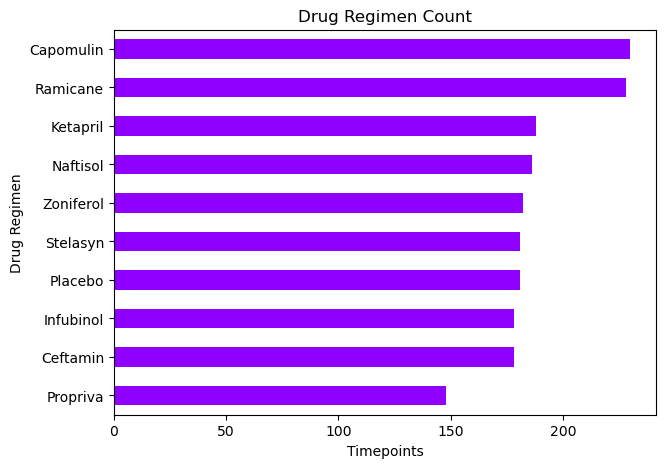

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Step 1 Group the data by 'Drug Regimen' and count the number of rows
drug_regimen_count = df_clean_data.groupby('Drug Regimen').size().sort_values()

# Step 2 Create a bar plot
drug_regimen_count.plot(kind='barh', color='#8F00FF', figsize=(7, 5))

# Step 3 Set up the title and labels
plt.title('Drug Regimen Count')
plt.xlabel('Timepoints')
plt.ylabel('Drug Regimen')

# Step 4 Show the plot
plt.show()

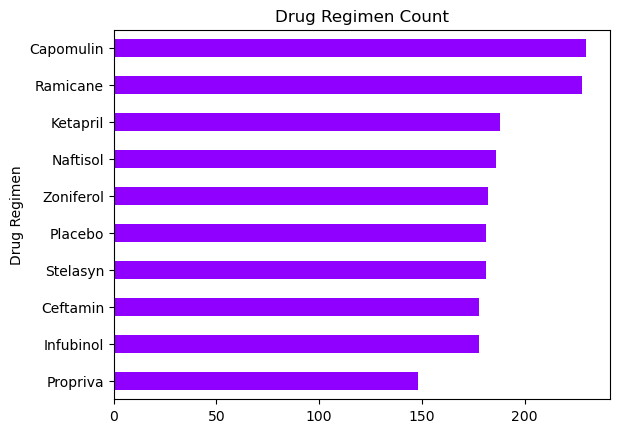

In [17]:
# Another way learned in class
df_clean_data["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Count", color="#8F00FF")
plt.show()

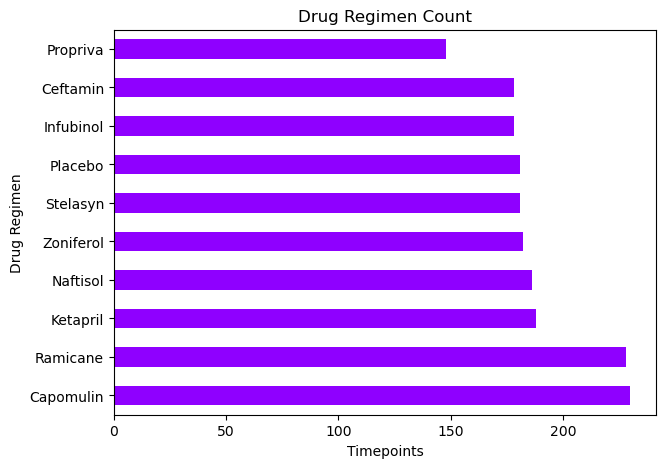

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Step 1
drug_regimen_count = df_clean_data["Drug Regimen"].value_counts()
x = list(df_clean_data.index)
y = list(df_clean_data.values)

# Step 2 Create a bar plot
drug_regimen_count.plot(kind='barh', color='#8F00FF', figsize=(7, 5))

# Step 3 Set up the title and labels
plt.title('Drug Regimen Count')
plt.xlabel('Timepoints')
plt.ylabel('Drug Regimen')

# Step 4 Show the plot
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a DataFrame from the clean data
sex_count = df_clean_data["Sex"].value_counts()
sex_count


Sex
Male      958
Female    922
Name: count, dtype: int64

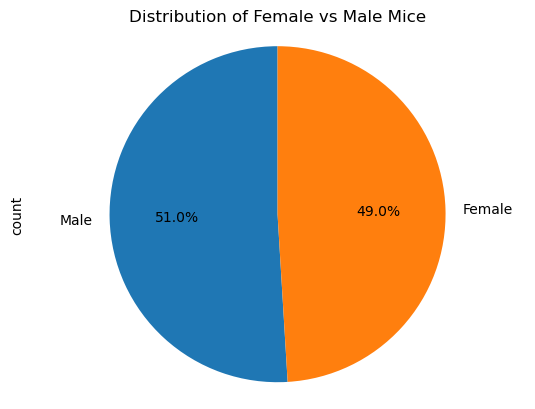

In [20]:
sex_count.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle - Tip by Xpert
plt.show()


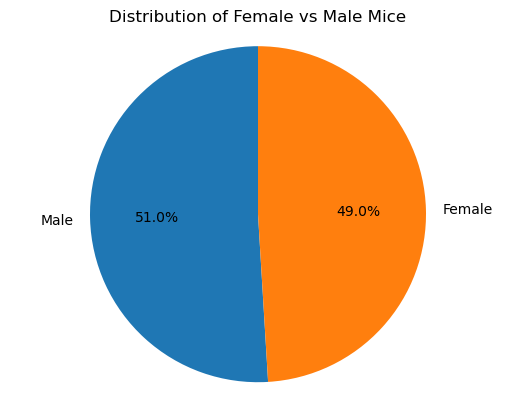

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a DataFrame from the clean data
sex_count = df_clean_data["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

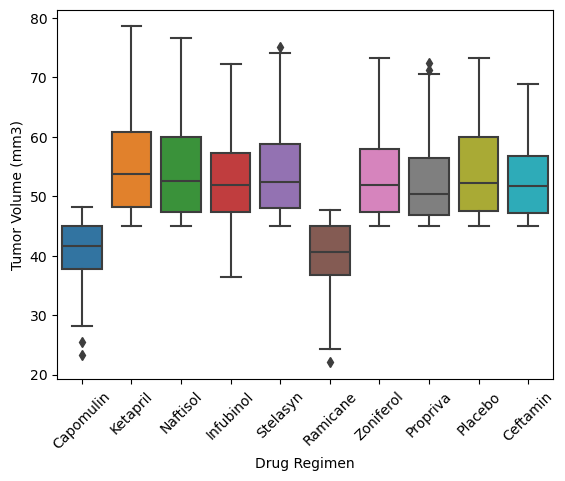

In [24]:
sns.boxplot(data=df_clean_data, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.xticks(rotation=45)
plt.show()

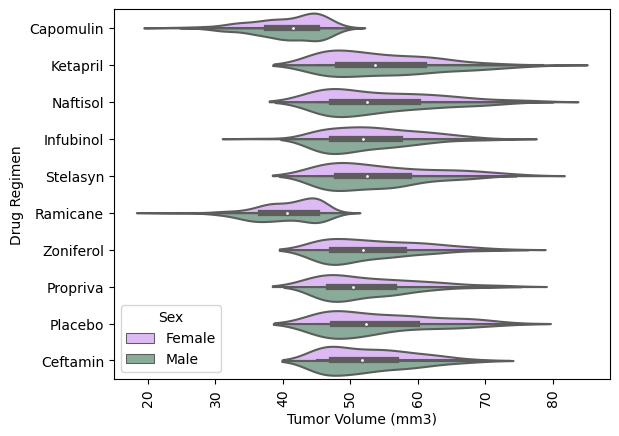

In [86]:
# Define a custom color palette
custom_palette = {"Male": "#85B09A", "Female": "#E0B0FF"}

# Create the violin plot with custom colors and rotate x-axis labels
sns.violinplot(data=df_clean_data, y="Drug Regimen", x="Tumor Volume (mm3)", hue="Sex", split=True, palette=custom_palette)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = df_clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, df_clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the merged DataFrame by only the four specific treatment regimens
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(specified_regimens)]
final_tumor_volume

# Display only the first 100 rows and 5 columns of the final tumor volume data
#final_tumor_volume.iloc[:100, :5]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [103]:
# Option learned in class to Calculate the final tumor volume of each mouse across the specified treatment regimens
final_tumor_volume = df_clean_data.groupby('Mouse ID').Timepoint.max().reset_index()
sub = df_clean_data.loc[:, ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]]

final_tumor_volume = pd.merge(final_tumor_volume, sub, on=["Mouse ID", "Timepoint"])

# overwrite
mask = final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
final_tumor_volume = final_tumor_volume.loc[mask].reset_index(drop=True) # dropping rows tip by Prof

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,a203,45,Infubinol,67.973419,Female
1,a251,45,Infubinol,65.525743,Female
2,a275,45,Ceftamin,62.999356,Female
3,a411,45,Ramicane,38.407618,Male
4,a444,45,Ramicane,43.047543,Female
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,Female
96,y793,45,Capomulin,31.896238,Male
97,y865,45,Ceftamin,64.729837,Male
98,z578,45,Ramicane,30.638696,Male


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = subset['Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list for plotting
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Display potential outliers
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Potential outliers for {treatment}:")
    outliers.head()


Potential outliers for Capomulin:
Potential outliers for Ramicane:
Potential outliers for Infubinol:
Potential outliers for Ceftamin:


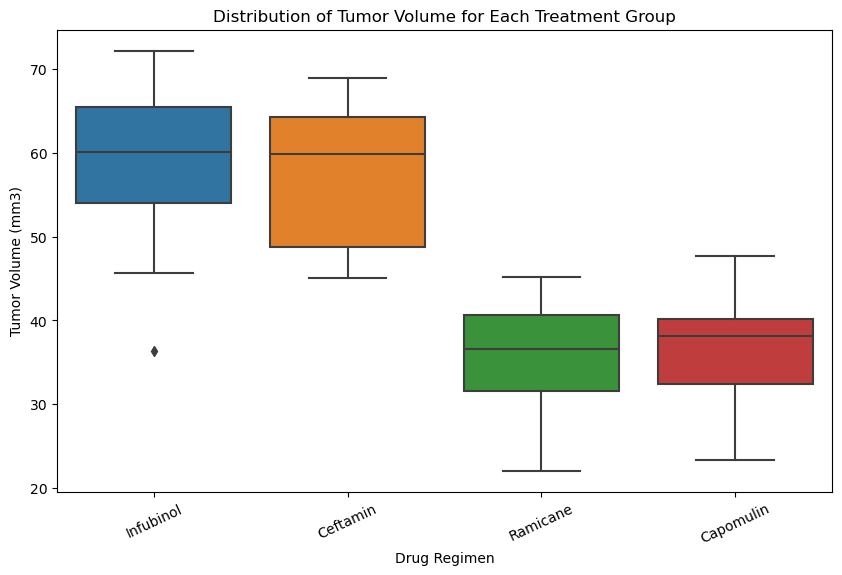

In [84]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_tumor_volume, x='Drug Regimen', y='Tumor Volume (mm3)')

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.xticks(rotation=25)

plt.show()

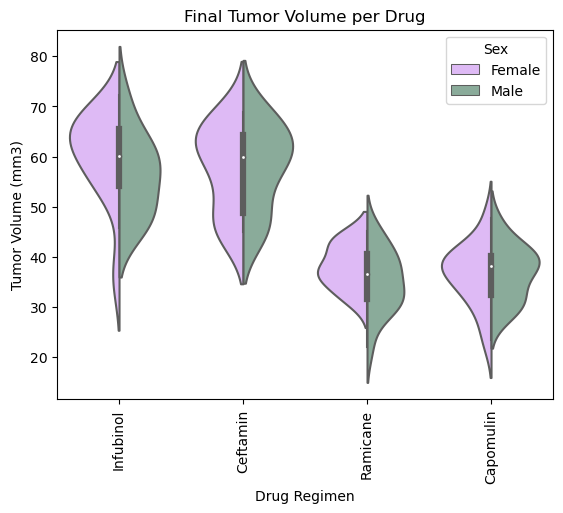

In [101]:
# Violinplot
custom_palette = {"Male": "#85B09A", "Female": "#E0B0FF"}
sns.violinplot(data=final_tumor_volume, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex", split=True, palette=custom_palette)
plt.xticks(rotation=90)
plt.title("Final Tumor Volume per Drug")
plt.show()

## Line and Scatter Plots

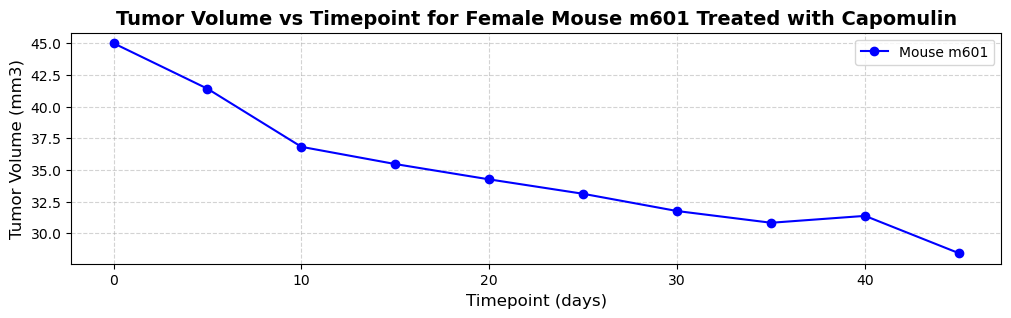

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1 filter the data for a single mouse ID treated with Capomulin
mouse_id = 'm601'
capomulin_data = df_clean_data[(df_clean_data['Mouse ID'] == mouse_id) & (df_clean_data['Drug Regimen'] == 'Capomulin')]


# Plot the data
plt.figure(figsize=(12, 3))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse {mouse_id}')

plt.xlabel("Timepoint (days)", fontsize=12, fontstyle="normal")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="normal")
plt.title(f"Tumor Volume vs Timepoint for Female Mouse {mouse_id} Treated with Capomulin", fontsize=14, fontweight="bold")


plt.grid(color="darkgray", linestyle="--", alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

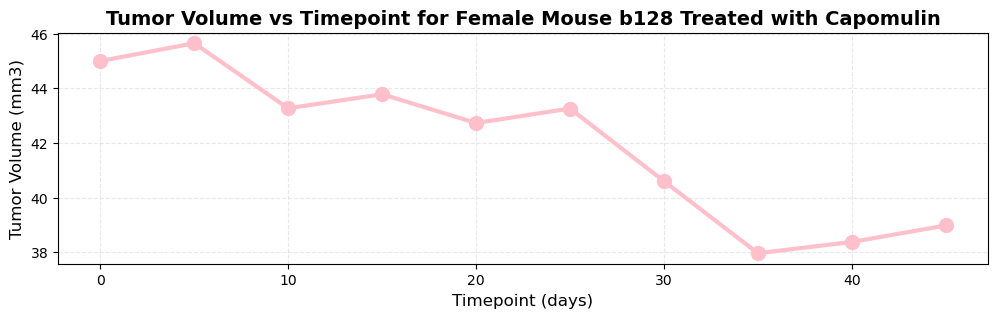

In [61]:
# Option Learned in class by Prof Alexander Booth
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin using a female this time
df_clean_data.loc[df_clean_data["Drug Regimen"] == "Capomulin"]
mouse_id = 'b128'

single_mouse = df_clean_data.loc[df_clean_data["Mouse ID"] == mouse_id]

# Step 1: Get the data
# x_axis, points_F, points_C

time = single_mouse["Timepoint"]
y = single_mouse["Tumor Volume (mm3)"]

# Step 2: Initialize the canvas
plt.figure(figsize=(12, 3))

# Step 3: BLAND graph or a skeleton graph
plt.plot(time, y, color="pink", linewidth=3, marker="o", markersize=10)

# Step 4: Customize the graph
# LABEL X/Y Axis (UNITS when appropriate)
# TITLE
# Optional: Line Thickness, markers, legend, gridlines
plt.xlabel("Timepoint (days)", fontsize=12, fontstyle="normal")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="normal")
plt.title(f"Tumor Volume vs Timepoint for Female Mouse {mouse_id} Treated with Capomulin", fontsize=14, fontweight="bold")

# Set limits - Indication for optional changes
# plt.xlim(-5, 125)
# plt.ylim(0, 100)

# legend and grid
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save the Graph
# plt.savefig("give it a name")
plt.show()

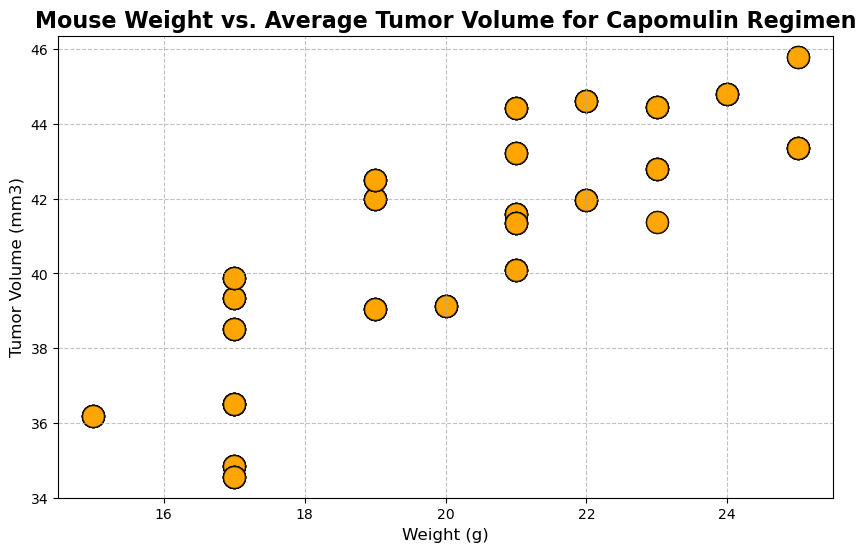

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate data for Capomulin regimen selection only
capomulin_data = df_clean_data[df_clean_data["Drug Regimen"].str.contains("Capomulin")]

# Generate mean tumor volume for that list per mouse(knowing I already have it - but prefer using this method instead. 
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Generate weight for each mouse
mouse_weight = capomulin_data[["Mouse ID", "Weight (g)"]]

# Merging the mean tumor volume and mouse weight dataframes
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Generate scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='orange', alpha=0.7, edgecolor="black", s=250)
plt.xlabel("Weight (g)", fontsize=12, fontstyle="normal")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="normal")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=16,fontweight="bold")
plt.grid(color="darkgrey", linestyle = "--", alpha=0.7)
plt.show()

## Correlation and Regression

In [111]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

In [114]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [117]:
corrs = merged_data.corr(numeric_only = True)
corrs

#correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
#print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation}")

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.834396
Weight (g),0.834396,1.000000


In [119]:
.83 ** 2

0.6889

In [121]:
# Perform linear regression with scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The equation of the regression line using scipy.stats.linregress is: {line_eq}")

# Perform linear regression with sklearn.linear_model.LinearRegression
model = LinearRegression()
model.fit(merged_data[['Weight (g)']], merged_data['Tumor Volume (mm3)'])

# Get the slope and intercept
slope_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_

# Make predictions
predictions = model.predict(merged_data[['Weight (g)']])

# Calculate R-squared using sklearn.metrics.r2_score
r_squared = r2_score(merged_data['Tumor Volume (mm3)'], predictions)
print(f"The equation of the regression line using sklearn.linear_model.LinearRegression is: y = {round(slope_sklearn, 2)}x + {round(intercept_sklearn, 2)}")
print(f"The R-squared value using sklearn.metrics.r2_score is: {r_squared}")

The equation of the regression line using scipy.stats.linregress is: y = 0.96x + 21.49
The equation of the regression line using sklearn.linear_model.LinearRegression is: y = 0.96x + 21.49
The R-squared value using sklearn.metrics.r2_score is: 0.6962164535925326


The r-squared is: 0.6962164535925323


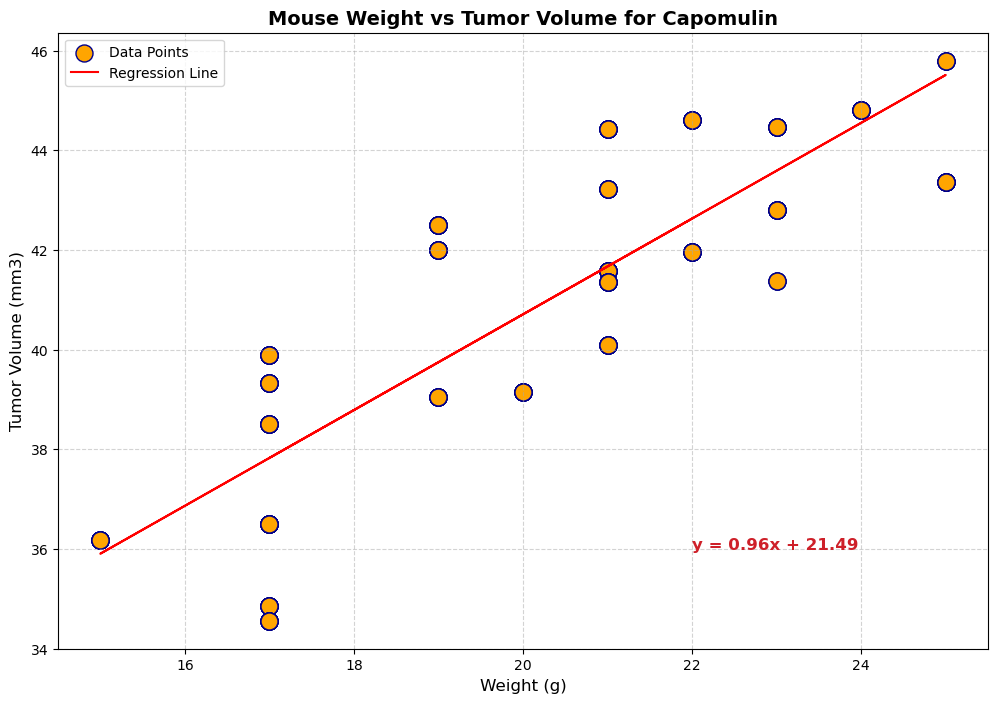

In [158]:
# Custimize scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='orange', label='Data Points', edgecolor="darkblue", s=150)

# Plot the regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Regression Line')

plt.xlabel("Weight (g)", fontsize=12, fontstyle="normal")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="normal")
plt.title("Mouse Weight vs Tumor Volume for Capomulin", fontweight="bold", fontsize=14)
plt.grid(color="darkgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=12,fontweight="bold", color="#CE2029")
plt.legend()
print(f"The r-squared is: {rvalue**2}")
plt.show()

y = 0.96x + 21.49
The r-squared is: 0.6962164535925326


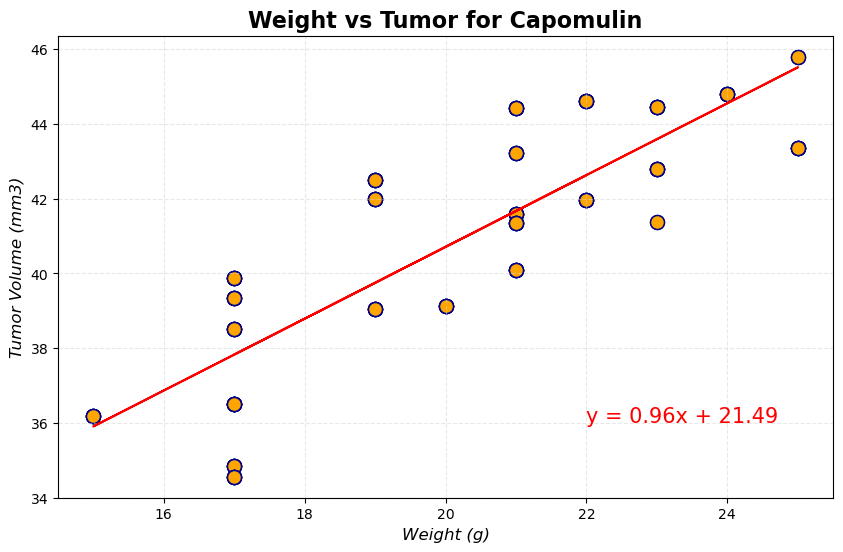

In [159]:
# In the scikit learn lib -Learned in class referency Prof Alexander Booth

x_values = merged_data["Weight (g)"].values.reshape(-1, 1)
y_values = merged_data["Tumor Volume (mm3)"].values

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

# Make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="orange", edgecolor="darkblue", s=100)
plt.plot(x_values, preds, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

plt.show()